In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
random.seed(42)

%matplotlib inline

In [2]:
def get_image_intensity_histogram(file_location):
    image = cv2.imread(file_location)
    resized_image = cv2.resize(image, (200, 200), interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    return np.squeeze(hist)
    

In [3]:
def get_features_labels(data_path):
    X, y = [], []
    features_with_labels = []
    for fol in os.listdir(data_path):
        if ((fol[0] == "b") or (fol[0] == "w")):
            fol_path = os.path.join(data_path, fol)
            for file in os.listdir(fol_path):
                if ".jpg" in file:

                    if fol[0] == "b":
                        label = 0
                    else:
                        label = 1

                    complete_file_loc = os.path.join(fol_path, file)
                    #print(complete_file_loc)
                    features_with_labels.append({"feature": get_image_intensity_histogram(complete_file_loc), "label": label})
                    
    random.shuffle(features_with_labels)
    #print(X[0][0])
    #print(X[0][1])
    X = [x["feature"] for x in features_with_labels]
    y = [x["label"] for x in features_with_labels]

    return np.array(X), np.array(y)

In [4]:
X_train, y_train = get_features_labels("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\train")
X_test, y_test = get_features_labels("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\test")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6899, 256)
(6899,)
(185, 256)
(185,)


In [5]:
import itertools
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
def generate_performance_results(actual, predicted):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(actual, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["black", "white"], title='Confusion matrix, without normalization')
    
    print("Precision, recall, F score and support (per class): ")
    print(precision_recall_fscore_support(actual, predicted))
    print("Accuracy")
    print(accuracy_score(actual, predicted))

## Baseline XGBoost model

G:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
G:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


(185,)
Confusion matrix, without normalization
[[81  9]
 [ 1 94]]
Precision, recall, F score and support (per class): 
(array([0.99, 0.91]), array([0.9 , 0.99]), array([0.94, 0.95]), array([90, 95], dtype=int64))
Accuracy
0.9459459459459459


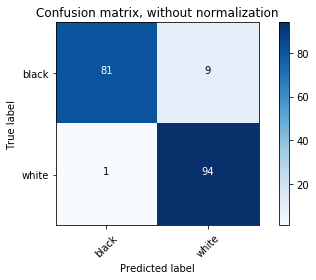

In [6]:
import xgboost as xgb

gbm = xgb.XGBClassifier(max_depth=5, n_estimators=1000, learning_rate=0.05, objective= 'binary:logistic').fit(X_train, y_train)
y_test_prections = gbm.predict(X_test)
y_train_predictions = gbm.predict(X_train)
print(y_test_prections.shape)

generate_performance_results(y_test, y_test_prections)